<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#This-notebook-presents-the-general-scalp-plots-for-the-4-major-wavebands,-as-well-as-the-difference-between-men-&amp;-women-and-the-difference-between-inattentive-subtype-and-combined-subtype." data-toc-modified-id="This-notebook-presents-the-general-scalp-plots-for-the-4-major-wavebands,-as-well-as-the-difference-between-men-&amp;-women-and-the-difference-between-inattentive-subtype-and-combined-subtype.-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>This notebook presents the general scalp plots for the 4 major wavebands, as well as the difference between men &amp; women and the difference between inattentive subtype and combined subtype.</a></span><ul class="toc-item"><li><span><a href="#First,-import-data-&amp;-data-wrangling." data-toc-modified-id="First,-import-data-&amp;-data-wrangling.-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>First, import data &amp; data wrangling.</a></span></li></ul></li><li><span><a href="#Let's-have-a-look-at-our-scalp-plots.-We-used-hytools-to-create-these-plots." data-toc-modified-id="Let's-have-a-look-at-our-scalp-plots.-We-used-hytools-to-create-these-plots.-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Let's have a look at our scalp plots. We used hytools to create these plots.</a></span><ul class="toc-item"><li><span><a href="#First,-we-have-a-little-bit-more-data-wrangling-to-do." data-toc-modified-id="First,-we-have-a-little-bit-more-data-wrangling-to-do.-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>First, we have a little bit more data wrangling to do.</a></span><ul class="toc-item"><li><span><a href="#This-is-the-main-function-for-creating-scalp-plots." data-toc-modified-id="This-is-the-main-function-for-creating-scalp-plots.-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>This is the main function for creating scalp plots.</a></span></li></ul></li><li><span><a href="#These-are-the-general-scalp-plots.-They-represent-our-whole-sample,-not-taking-gender-nor-ADHD-subtype-into-account." data-toc-modified-id="These-are-the-general-scalp-plots.-They-represent-our-whole-sample,-not-taking-gender-nor-ADHD-subtype-into-account.-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>These are the general scalp plots. They represent our whole sample, not taking gender nor ADHD subtype into account.</a></span></li><li><span><a href="#But-more-interestingly,-we-can-visualize-the-distribution-difference-between-genders-and-between-the-inattentive-and-combined-subtypes" data-toc-modified-id="But-more-interestingly,-we-can-visualize-the-distribution-difference-between-genders-and-between-the-inattentive-and-combined-subtypes-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>But more interestingly, we can visualize the distribution difference between genders and between the inattentive and combined subtypes</a></span><ul class="toc-item"><li><span><a href="#Let's-reorganize-our-dataset-and-compute-the-difference." data-toc-modified-id="Let's-reorganize-our-dataset-and-compute-the-difference.-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>Let's reorganize our dataset and compute the difference.</a></span></li></ul></li><li><span><a href="#And-now,-we-can-use-the-same-method-to-reorganize-data-&amp;-compute-the-difference-between-men-and-women-within-our-sample." data-toc-modified-id="And-now,-we-can-use-the-same-method-to-reorganize-data-&amp;-compute-the-difference-between-men-and-women-within-our-sample.-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>And now, we can use the same method to reorganize data &amp; compute the difference between men and women within our sample.</a></span></li><li><span><a href="#These-are-the-scalp-plot-distributions-for-the-men-and-women-difference." data-toc-modified-id="These-are-the-scalp-plot-distributions-for-the-men-and-women-difference.-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>These are the scalp plot distributions for the men and women difference.</a></span></li><li><span><a href="#Now,-we-can-look-at-subtype-difference." data-toc-modified-id="Now,-we-can-look-at-subtype-difference.-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Now, we can look at subtype difference.</a></span></li></ul></li></ul></div>

# This notebook presents the general scalp plots for the 4 major wavebands, as well as the difference between men & women and the difference between inattentive subtype and combined subtype.

## First, import data & data wrangling.

In [1]:
import pandas as pd
import numpy as np
import scipy
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import preprocessing as pre
import os
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import plotly.graph_objects as go
import ipywidgets
from ipywidgets import widgets
from sklearn import preprocessing
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [23]:
df_analysis = pd.read_csv('Data/df_analysis', index_col=[0])
gender_pvals = pd.read_csv('Data/pvals', index_col=[0])
subtype_pvals = pd.read_csv('Data/subtype_pvals', index_col=[0])
print(df_analysis.dtypes)
print(gender_pvals.dtypes)


id                     int64
Gender                 int64
subtype               object
adhdtype               int64
brain_oscillation     object
electrode             object
fft_abs_power        float64
cIM                  float64
cHR                  float64
cIE                  float64
cSC                  float64
Aqtot                float64
Aqaudi               float64
Aqvis                float64
RCQtot               float64
RCQaudi              float64
RCQvis               float64
dtype: object
0    float64
dtype: object


In [3]:
df_analysis['Gender'] = df_analysis['Gender'].apply(str)
df_analysis['adhdtype'] = df_analysis['adhdtype'].apply(str)
print(df_analysis.dtypes)


id                     int64
Gender                object
subtype               object
adhdtype              object
brain_oscillation     object
electrode             object
fft_abs_power        float64
cIM                  float64
cHR                  float64
cIE                  float64
cSC                  float64
Aqtot                float64
Aqaudi               float64
Aqvis                float64
RCQtot               float64
RCQaudi              float64
RCQvis               float64
dtype: object


# Let's have a look at our scalp plots. We used hytools to create these plots.

## First, we have a little bit more data wrangling to do. 

In [4]:
df_eeg = pd.read_csv('Data/df_eeg_topo', index_col=[0])


In [5]:
# getting fft_abs_power for each waveband separately 

alpha = df_eeg.loc[df_eeg['brain_oscillation'] == 'Alpha']
alpha = alpha[['electrode','fft_abs_power']]
beta = df_eeg.loc[df_eeg['brain_oscillation'] == 'Beta']
beta = beta[['electrode','fft_abs_power']]
delta = df_eeg.loc[df_eeg['brain_oscillation'] == 'Delta']
delta = delta[['electrode','fft_abs_power']]
theta = df_eeg.loc[df_eeg['brain_oscillation'] == 'Theta']
theta = theta[['electrode','fft_abs_power']]


In [6]:
# We need to compute the mean absolute power for each electrode.
avg_abspow_by_electro_alpha = alpha.groupby('electrode')['fft_abs_power'].agg('mean')
avg_abspow_by_electro_beta = beta.groupby('electrode')['fft_abs_power'].agg('mean')
avg_abspow_by_electro_delta = delta.groupby('electrode')['fft_abs_power'].agg('mean')
avg_abspow_by_electro_theta = theta.groupby('electrode')['fft_abs_power'].agg('mean')


In [7]:
# The data we will need for create our topoplots are the mean fft absolute power for each electrode.
# the mean amplitude were computed in a previous section for graph plots of each electrodes amplitude
# There will be one topoplot for each frequency band. They will need to be called as toplot in the plotting function.
mean_alpha = np.asarray(avg_abspow_by_electro_alpha)
mean_beta = np.asarray(avg_abspow_by_electro_beta)
mean_delta = np.asarray(avg_abspow_by_electro_delta)
mean_theta = np.asarray(avg_abspow_by_electro_theta)
data = [mean_delta, mean_theta, mean_alpha, mean_beta]

In [8]:
titles = ['Delta', 'Theta', 'Alpha', 'Beta', ]
#corresponding electrodes in order are: C3, C4, Cz, F3, F4, F7, F8, FP1, FP2, Fz, O1, O2, P3, P4, Pz, T3, T4, T5, T6
ch_xy = np.array([[-2, 0], [2, 0], [0, 0], [-2, 2], [2, 2], [-4, 2], [4, 2], [-2, 4], [2, 4], [0, 2], [-2, -4], [2, -4], 
                [-2, -2], [2, -2], [0, -2], [-4, 0], [4, 0], [-4, -2], [4, -2]])

### This is the main function for creating scalp plots.

In [9]:
from mne.io import read_raw_ctf
import os
import matplotlib
import mne
import numpy as np
from mne.preprocessing import ICA, create_eog_epochs, create_ecg_epochs
import time
from IPython.display import clear_output
import mne
import matplotlib.pyplot as plt
from scipy.io import savemat, loadmat
from mpl_toolkits.axes_grid1 import make_axes_locatable


def array_topoplot(toplot, ch_xy, showtitle=True, titles=titles, savefig=False, figpath=None, vmin=0, vmax=30, cmap='jet', with_mask=False, masks=None, show=True):
    #create fig
    mask_params = dict(marker='o', markerfacecolor='w', markeredgecolor='k', linewidth=0, markersize=5)
    fig, ax = plt.subplots(1,len(toplot), figsize=(20,10))
   # mplcursors.cursor(hover=True)
    for i, data in enumerate(toplot):
        if with_mask == False:
            image,_ = mne.viz.plot_topomap(data=data, pos=ch_xy, cmap=cmap, vmin=vmin, vmax=vmax, axes=ax[i], show=False, contours=None, extrapolate='box', outlines='head')
        elif with_mask == True:
            image,_ = mne.viz.plot_topomap(data=data, pos=ch_xy, cmap=cmap, vmin=vmin, vmax=vmax, axes=ax[i], show=False, contours=None, mask_params=mask_params, mask=masks[i], extrapolate='box', outlines='head')
        #option for title
        if showtitle == True:
            ax[i].set_title(titles[i], fontdict={'fontsize': 20, 'fontweight': 'heavy'})
    #add a colorbar at the end of the line (weird trick from https://www.martinos.org/mne/stable/auto_tutorials/stats-sensor-space/plot_stats_spatio_temporal_cluster_sensors.html#sphx-glr-auto-tutorials-stats-sensor-space-plot-stats-spatio-temporal-cluster-sensors-py)
    divider = make_axes_locatable(ax[-1])
    ax_colorbar = divider.append_axes('right', size='5%', pad=0.05)
    plt.colorbar(image, cax=ax_colorbar)
    ax_colorbar.tick_params(labelsize=14)
    #save plot if specified
    if savefig == True:
        plt.savefig(figpath, dpi=300)
    if show == True:
        plt.show()
        plt.close(fig=fig)
    else:
        plt.close(fig=fig)
    return fig

## These are the general scalp plots. They represent our whole sample, not taking gender nor ADHD subtype into account.

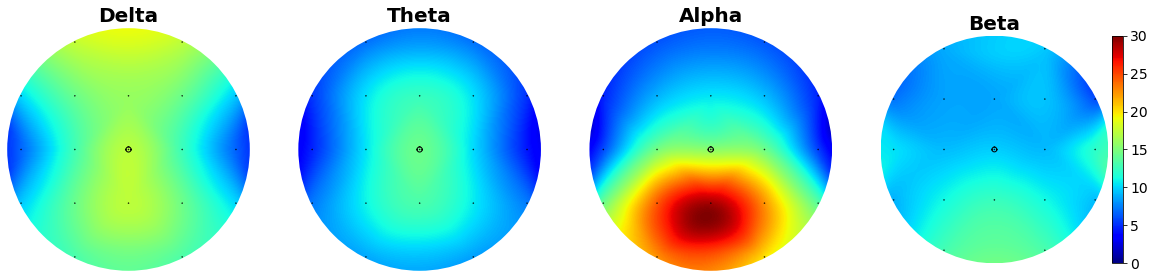

In [10]:
array_topoplot(data, ch_xy); # ";" needed in notebook so it doesn't print in double, maybe remove if on other ide

## But more interestingly, we can visualize the distribution difference between genders and between the inattentive and combined subtypes
### Let's reorganize our dataset and compute the difference.

In [11]:
#First, let's separate eeg data according to adhd subtype
adhd1=df_eeg.loc[df_eeg['adhdtype']==1] #inattentive
adhd2=df_eeg.loc[df_eeg['adhdtype']==2] #mixed

# Then, we prepare the arrays for our plot function for ADHD Inattentive subtype.
#select brainwaves from df_eeg separated by adhdtype 1 (inattentive)
adhd1_alpha=adhd1.loc[adhd1['brain_oscillation']=='Alpha']
adhd1_beta=adhd1.loc[adhd1['brain_oscillation']=='Beta']
adhd1_delta=adhd1.loc[adhd1['brain_oscillation']=='Delta']
adhd1_theta=adhd1.loc[adhd1['brain_oscillation']=='Theta']

#select fft/electrode (necessary columns only)
adhd1_alpha_=adhd1_alpha[['electrode', 'fft_abs_power']]
adhd1_beta_=adhd1_beta[['electrode', 'fft_abs_power']]
adhd1_delta_=adhd1_delta[['electrode', 'fft_abs_power']]
adhd1_theta_=adhd1_theta[['electrode', 'fft_abs_power']]

#compute average fft absolute power for each electrode for each brainwave separately
avg_abspow_by_electro_alpha_1 = adhd1_alpha_.groupby('electrode')['fft_abs_power'].agg('mean')
avg_abspow_by_electro_beta_1 = adhd1_beta_.groupby('electrode')['fft_abs_power'].agg('mean')
avg_abspow_by_electro_delta_1 = adhd1_delta_.groupby('electrode')['fft_abs_power'].agg('mean')
avg_abspow_by_electro_theta_1 = adhd1_theta_.groupby('electrode')['fft_abs_power'].agg('mean')

#The data we will need for create our topoplots are the mean fft absolute power for each electrode.
#the mean amplitude were computed in a previous section for graph plots of each electrodes amplitude
#There will be one topoplot for each frequency band. They will need to be called as toplot in the plotting function.
mean1_alpha = np.asarray(avg_abspow_by_electro_alpha_1)
mean1_beta = np.asarray(avg_abspow_by_electro_beta_1)
mean1_delta = np.asarray(avg_abspow_by_electro_delta_1)
mean1_theta = np.asarray(avg_abspow_by_electro_theta_1)
data_adhd1 = [mean1_delta, mean1_theta, mean1_alpha, mean1_beta]

# Now, we do the same thing for ADHD subtype Combined

#select brainwaves from df_eeg separated by adhdtype 1 (inattentive)
adhd2_alpha=adhd2.loc[adhd2['brain_oscillation']=='Alpha']
adhd2_beta=adhd2.loc[adhd2['brain_oscillation']=='Beta']
adhd2_delta=adhd2.loc[adhd2['brain_oscillation']=='Delta']
adhd2_theta=adhd2.loc[adhd2['brain_oscillation']=='Theta']

#select fft/electrode (necessary columns only)
adhd2_alpha_=adhd2_alpha[['electrode', 'fft_abs_power']]
adhd2_beta_=adhd2_beta[['electrode', 'fft_abs_power']]
adhd2_delta_=adhd2_delta[['electrode', 'fft_abs_power']]
adhd2_theta_=adhd2_theta[['electrode', 'fft_abs_power']]

#compute average fft absolute power for each electrode for each brainwave separately
avg_abspow_by_electro_alpha_2 = adhd2_alpha_.groupby('electrode')['fft_abs_power'].agg('mean')
avg_abspow_by_electro_beta_2 = adhd2_beta_.groupby('electrode')['fft_abs_power'].agg('mean')
avg_abspow_by_electro_delta_2 = adhd2_delta_.groupby('electrode')['fft_abs_power'].agg('mean')
avg_abspow_by_electro_theta_2 = adhd2_theta_.groupby('electrode')['fft_abs_power'].agg('mean')

#The data we will need for create our topoplots are the mean fft absolute power for each electrode.
#the mean amplitude were computed in a previous section for graph plots of each electrodes amplitude
#There will be one topoplot for each frequency band. They will need to be called as toplot in the plotting function.
mean2_alpha = np.asarray(avg_abspow_by_electro_alpha_2)
mean2_beta = np.asarray(avg_abspow_by_electro_beta_2)
mean2_delta = np.asarray(avg_abspow_by_electro_delta_2)
mean2_theta = np.asarray(avg_abspow_by_electro_theta_2)
data_adhd2 = [mean2_delta, mean2_theta, mean2_alpha, mean2_beta]


In [12]:
# Now, we compute the difference between our groups (A - B/B)
subtract_adhd=np.subtract(data_adhd1, data_adhd2) # substract 
divide_adhd=np.true_divide(subtract_adhd, data_adhd2) # divide substraction result by gender 2 so they're on same scale
divide_adhd


array([[-0.15230971, -0.16646598, -0.12158556, -0.15127485, -0.15271753,
        -0.23209716, -0.2983897 , -0.32311384, -0.33169235, -0.12202513,
        -0.22110913, -0.145522  , -0.17747027, -0.15818664, -0.15064459,
        -0.17734877, -0.16534479, -0.22827288, -0.15826652],
       [-0.15635397, -0.1325185 , -0.08169384, -0.09870633, -0.0824537 ,
        -0.15081263, -0.12088438, -0.13118852, -0.12884744, -0.05955258,
        -0.20219279, -0.18241282, -0.20002423, -0.19086015, -0.18428617,
        -0.14205023, -0.12035392, -0.22356739, -0.17396668],
       [-0.29172888, -0.29187895, -0.28821215, -0.29555757, -0.29509006,
        -0.30249533, -0.29070216, -0.29636901, -0.2937702 , -0.27523374,
        -0.4732109 , -0.40888713, -0.40192075, -0.37646447, -0.3557101 ,
        -0.26165871, -0.29257602, -0.4454993 , -0.3110569 ],
       [-0.24061149, -0.24634271, -0.23963503, -0.20420339, -0.27345359,
        -0.08649311, -0.21883924, -0.0618771 , -0.34791177, -0.21484823,
        -0.150

## And now, we can use the same method to reorganize data & compute the difference between men and women within our sample.

In [13]:
#First, separate eeg data according to gender.

gender1=df_eeg.loc[df_eeg['Gender']==1]
gender2=df_eeg.loc[df_eeg['Gender'] == 2]


#select brainwaves from df_eeg separated by gender 1 (women)
gender1_alpha=gender1.loc[gender1['brain_oscillation']=='Alpha']
gender1_alpha1=gender1.loc[gender1['brain_oscillation']=='Alpha1']
gender1_alpha2=gender1.loc[gender1['brain_oscillation']=='Alpha2']
gender1_beta=gender1.loc[gender1['brain_oscillation']=='Beta']
gender1_beta1=gender1.loc[gender1['brain_oscillation']=='Beta1']
gender1_beta2=gender1.loc[gender1['brain_oscillation']=='Beta2']
gender1_delta=gender1.loc[gender1['brain_oscillation']=='Delta']
gender1_theta=gender1.loc[gender1['brain_oscillation']=='Theta']


#select necessary columns 
gender1_alpha_=gender1_alpha[['electrode', 'fft_abs_power']]
gender1_alpha1_=gender1_alpha1[['electrode', 'fft_abs_power']]
gender1_alpha2_=gender1_alpha2[['electrode', 'fft_abs_power']]
gender1_beta_=gender1_beta[['electrode', 'fft_abs_power']]
gender1_beta1_=gender1_beta1[['electrode', 'fft_abs_power']]
gender1_beta2_=gender1_beta2[['electrode', 'fft_abs_power']]
gender1_delta_=gender1_delta[['electrode', 'fft_abs_power']]
gender1_theta_=gender1_theta[['electrode', 'fft_abs_power']]


#compute average fft absolute power for each electrode for each brainwave separately
G1avg_abspow_by_electro_alpha_1 = gender1_alpha_.groupby('electrode')['fft_abs_power'].agg('mean')
G1avg_abspow_by_electro_alpha1_1 = gender1_alpha1_.groupby('electrode')['fft_abs_power'].agg('mean')
G1avg_abspow_by_electro_alpha2_1 = gender1_alpha2_.groupby('electrode')['fft_abs_power'].agg('mean')
G1avg_abspow_by_electro_beta_1 = gender1_beta_.groupby('electrode')['fft_abs_power'].agg('mean')
G1avg_abspow_by_electro_beta1_1 = gender1_beta1_.groupby('electrode')['fft_abs_power'].agg('mean')
G1avg_abspow_by_electro_beta2_1 = gender1_beta2_.groupby('electrode')['fft_abs_power'].agg('mean')
G1avg_abspow_by_electro_delta_1 = gender1_delta_.groupby('electrode')['fft_abs_power'].agg('mean')
G1avg_abspow_by_electro_theta_1 = gender1_theta_.groupby('electrode')['fft_abs_power'].agg('mean')

#There will be one topoplot for each frequency band. They will need to be called as toplot in the plotting function.
G1mean_alpha = np.asarray(G1avg_abspow_by_electro_alpha_1)
G1mean_alpha1 = np.asarray(G1avg_abspow_by_electro_alpha1_1)
G1mean_alpha2 = np.asarray(G1avg_abspow_by_electro_alpha2_1)
G1mean_beta = np.asarray(G1avg_abspow_by_electro_beta_1)
G1mean_beta1 = np.asarray(G1avg_abspow_by_electro_beta1_1)
G1mean_beta2 = np.asarray(G1avg_abspow_by_electro_beta2_1)
G1mean_delta = np.asarray(G1avg_abspow_by_electro_delta_1)
G1mean_theta = np.asarray(G1avg_abspow_by_electro_theta_1)
data_gender1 = [G1mean_delta, G1mean_theta, G1mean_alpha, G1mean_alpha1, G1mean_alpha2, G1mean_beta, G1mean_beta1, G1mean_beta2]
the_gender1 = [G1mean_delta, G1mean_theta, G1mean_alpha, G1mean_beta]
# And not, we do the same for men
#select brainwaves from df_eeg separated by gender 2 (men)
gender2_alpha=gender2.loc[gender2['brain_oscillation']=='Alpha']
gender2_alpha1=gender2.loc[gender2['brain_oscillation']=='Alpha1']
gender2_alpha2=gender2.loc[gender2['brain_oscillation']=='Alpha2']
gender2_beta=gender2.loc[gender2['brain_oscillation']=='Beta']
gender2_beta1=gender2.loc[gender2['brain_oscillation']=='Beta1']
gender2_beta2=gender2.loc[gender2['brain_oscillation']=='Beta2']
gender2_delta=gender2.loc[gender2['brain_oscillation']=='Delta']
gender2_theta=gender2.loc[gender2['brain_oscillation']=='Theta']


#select necessary columns 
gender2_alpha_=gender2_alpha[['electrode', 'fft_abs_power']]
gender2_alpha1_=gender2_alpha1[['electrode', 'fft_abs_power']]
gender2_alpha2_=gender2_alpha2[['electrode', 'fft_abs_power']]
gender2_beta_=gender2_beta[['electrode', 'fft_abs_power']]
gender2_beta1_=gender2_beta1[['electrode', 'fft_abs_power']]
gender2_beta2_=gender2_beta2[['electrode', 'fft_abs_power']]
gender2_delta_=gender2_delta[['electrode', 'fft_abs_power']]
gender2_theta_=gender2_theta[['electrode', 'fft_abs_power']]


#compute average fft absolute power for each electrode for each brainwave separately
G2avg_abspow_by_electro_alpha_2 = gender2_alpha_.groupby('electrode')['fft_abs_power'].agg('mean')
G2avg_abspow_by_electro_alpha1_2 = gender2_alpha1_.groupby('electrode')['fft_abs_power'].agg('mean')
G2avg_abspow_by_electro_alpha2_2 = gender2_alpha2_.groupby('electrode')['fft_abs_power'].agg('mean')
G2avg_abspow_by_electro_beta_2 = gender2_beta_.groupby('electrode')['fft_abs_power'].agg('mean')
G2avg_abspow_by_electro_beta1_2 = gender2_beta1_.groupby('electrode')['fft_abs_power'].agg('mean')
G2avg_abspow_by_electro_beta2_2 = gender2_beta2_.groupby('electrode')['fft_abs_power'].agg('mean')
G2avg_abspow_by_electro_delta_2 = gender2_delta_.groupby('electrode')['fft_abs_power'].agg('mean')
G2avg_abspow_by_electro_theta_2 = gender2_theta_.groupby('electrode')['fft_abs_power'].agg('mean')

#There will be one topoplot for each frequency band. They will need to be called as toplot in the plotting function.
G2mean_alpha = np.asarray(G2avg_abspow_by_electro_alpha_2)
G2mean_alpha1 = np.asarray(G2avg_abspow_by_electro_alpha1_2)
G2mean_alpha2 = np.asarray(G2avg_abspow_by_electro_alpha2_2)
G2mean_beta = np.asarray(G2avg_abspow_by_electro_beta_2)
G2mean_beta1 = np.asarray(G2avg_abspow_by_electro_beta1_2)
G2mean_beta2 = np.asarray(G2avg_abspow_by_electro_beta2_2)
G2mean_delta = np.asarray(G2avg_abspow_by_electro_delta_2)
G2mean_theta = np.asarray(G2avg_abspow_by_electro_theta_2)
data_gender2 = [G2mean_delta, G2mean_theta, G2mean_alpha, G2mean_alpha1, G2mean_alpha2, G2mean_beta, G2mean_beta1, G2mean_beta2]
the_gender2 = [G2mean_delta, G2mean_theta, G2mean_alpha, G2mean_beta]


In [14]:
# Now, we compute the difference between our groups (A - B/B)
subtract_gender=np.subtract(the_gender1, the_gender2) # substract gender 2 from gender 1 (women - men)
divide_gender=np.true_divide(subtract_gender, the_gender2) # divide substraction result by gender 2 so they're on same scale


## These are the scalp plot distributions for the men and women difference. 

In [15]:

titles = ['Delta', 'Theta', 'Alpha', 'Beta']
gender_pvals = np.asarray(gender_pvals)

In [16]:
#gender_pvals = gender_pvals.to_numpy()
def create_pval_mask(pvals, alpha=0.05):
    mask = np.zeros((len(pvals),), dtype='bool')
    for i, pval in enumerate(pvals):
        if pval <= alpha:
            mask[i] = True
    return mask

mask = create_pval_mask(gender_pvals, alpha=0.05)
mask = np.split(mask, 4)
mask

[array([False, False, False, False, False, False, False, False, False,
        False, False,  True, False, False, False, False, False, False,
        False]),
 array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False]),
 array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False]),
 array([False, False, False, False, False, False, False, False,  True,
        False, False, False, False, False, False,  True, False, False,
        False])]

In [17]:
def array_topoplot(toplot, ch_xy, showtitle=True, titles=titles, savefig=False, figpath=None, vmin=-1, vmax=1, cmap='jet', with_mask=True, masks=mask, show=True):
    #create fig
    mask_params = dict(marker='o', markerfacecolor='w', markeredgecolor='k', linewidth=0, markersize=8)
    fig, ax = plt.subplots(1,len(toplot), figsize=(20,10))
    for i, data in enumerate(toplot):
        if with_mask == False:
            image,_ = mne.viz.plot_topomap(data=data, pos=ch_xy, cmap=cmap, vmin=vmin, vmax=vmax, axes=ax[i], show=False, contours=None, extrapolate='box', outlines='head')
        elif with_mask == True:
            image,_ = mne.viz.plot_topomap(data=data, pos=ch_xy, cmap=cmap, vmin=vmin, vmax=vmax, axes=ax[i], show=False, contours=None, mask_params=mask_params, mask=masks[i], extrapolate='box', outlines='head')
        #option for title
        if showtitle == True:
            ax[i].set_title(titles[i], fontdict={'fontsize': 20, 'fontweight': 'heavy'})
    #add a colorbar at the end of the line (weird trick from https://www.martinos.org/mne/stable/auto_tutorials/stats-sensor-space/plot_stats_spatio_temporal_cluster_sensors.html#sphx-glr-auto-tutorials-stats-sensor-space-plot-stats-spatio-temporal-cluster-sensors-py)
    divider = make_axes_locatable(ax[-1])
    ax_colorbar = divider.append_axes('right', size='5%', pad=0.05)
    plt.colorbar(image, cax=ax_colorbar)
    ax_colorbar.tick_params(labelsize=14)
    #save plot if specified
    if savefig == True:
        plt.savefig(figpath, dpi=300)
    if show == True:
        plt.show()
        plt.close(fig=fig)
    else:
        plt.close(fig=fig)
    return fig

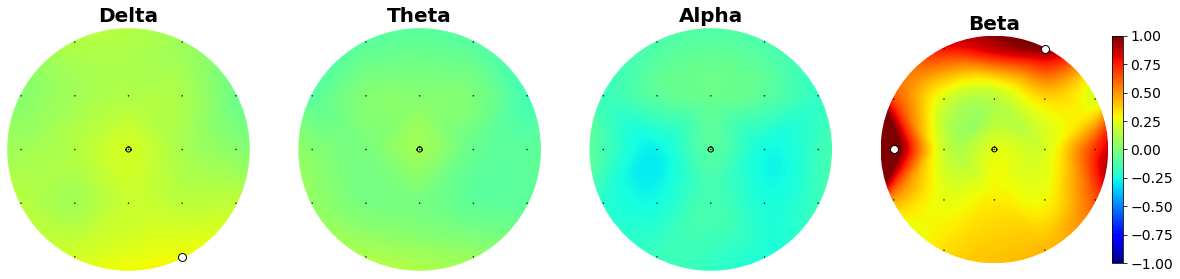

In [18]:
array_topoplot(divide_gender, ch_xy);

## Now, we can look at subtype difference.

In [19]:
subtype_pvals = np.asarray(subtype_pvals)

In [20]:
#gender_pvals = gender_pvals.to_numpy()
def create_pval_mask(pvals, alpha=0.05):
    mask = np.zeros((len(pvals),), dtype='bool')
    for i, pval in enumerate(pvals):
        if pval <= alpha:
            mask[i] = True
    return mask

mask = create_pval_mask(subtype_pvals, alpha=0.05)
mask1 = np.split(mask, 4)
mask1

[array([False, False, False, False, False,  True,  True, False, False,
        False, False, False, False, False, False, False, False, False,
        False]),
 array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False]),
 array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False]),
 array([ True,  True, False, False, False, False, False, False, False,
        False, False, False,  True,  True,  True, False, False, False,
        False])]

In [21]:
def array_topoplot(toplot, ch_xy, showtitle=True, titles=titles, savefig=False, figpath=None, vmin=-1, vmax=1, cmap='jet', with_mask=True, masks=mask1, show=True):
    #create fig
    mask_params = dict(marker='o', markerfacecolor='w', markeredgecolor='k', linewidth=0, markersize=8)
    fig, ax = plt.subplots(1,len(toplot), figsize=(20,10))
    for i, data in enumerate(toplot):
        if with_mask == False:
            image,_ = mne.viz.plot_topomap(data=data, pos=ch_xy, cmap=cmap, vmin=vmin, vmax=vmax, axes=ax[i], show=False, contours=None, extrapolate='box', outlines='head')
        elif with_mask == True:
            image,_ = mne.viz.plot_topomap(data=data, pos=ch_xy, cmap=cmap, vmin=vmin, vmax=vmax, axes=ax[i], show=False, contours=None, mask_params=mask_params, mask=masks[i], extrapolate='box', outlines='head')
        #option for title
        if showtitle == True:
            ax[i].set_title(titles[i], fontdict={'fontsize': 20, 'fontweight': 'heavy'})
    #add a colorbar at the end of the line (weird trick from https://www.martinos.org/mne/stable/auto_tutorials/stats-sensor-space/plot_stats_spatio_temporal_cluster_sensors.html#sphx-glr-auto-tutorials-stats-sensor-space-plot-stats-spatio-temporal-cluster-sensors-py)
    divider = make_axes_locatable(ax[-1])
    ax_colorbar = divider.append_axes('right', size='5%', pad=0.05)
    plt.colorbar(image, cax=ax_colorbar)
    ax_colorbar.tick_params(labelsize=14)
    #save plot if specified
    if savefig == True:
        plt.savefig(figpath, dpi=300)
    if show == True:
        plt.show()
        plt.close(fig=fig)
    else:
        plt.close(fig=fig)
    return fig

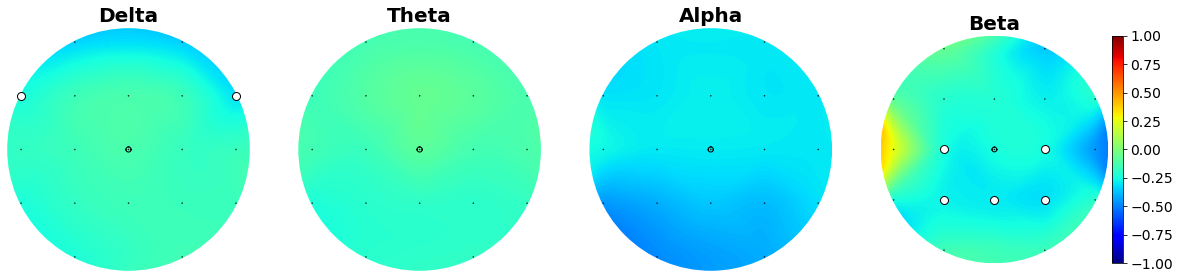

In [22]:
array_topoplot(divide_adhd, ch_xy);